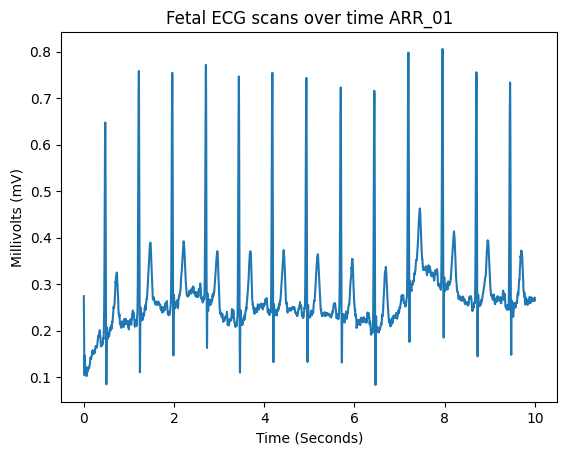

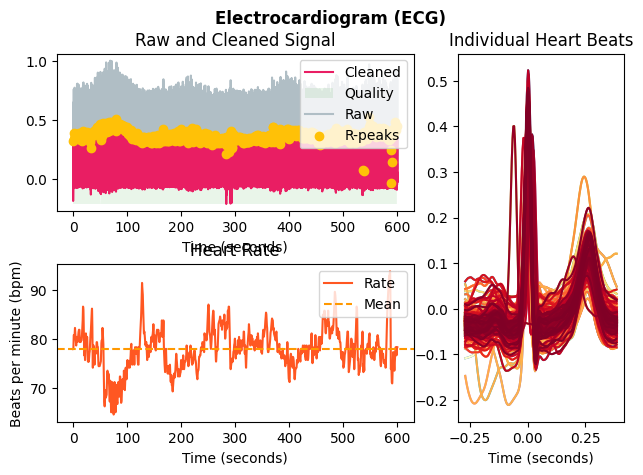

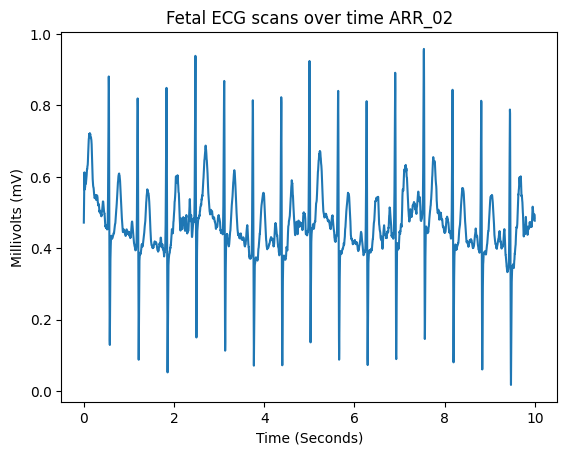

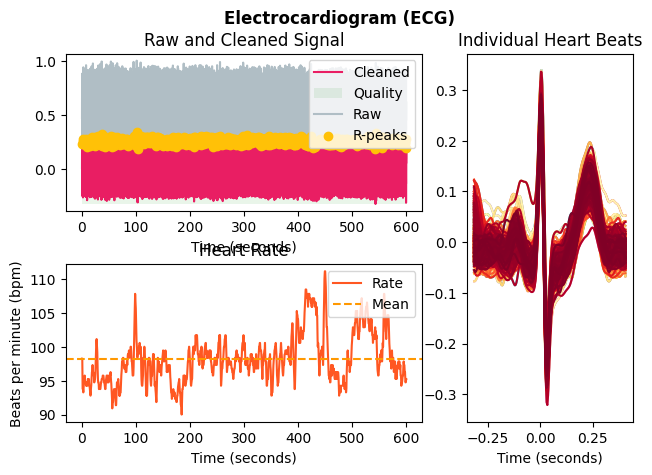

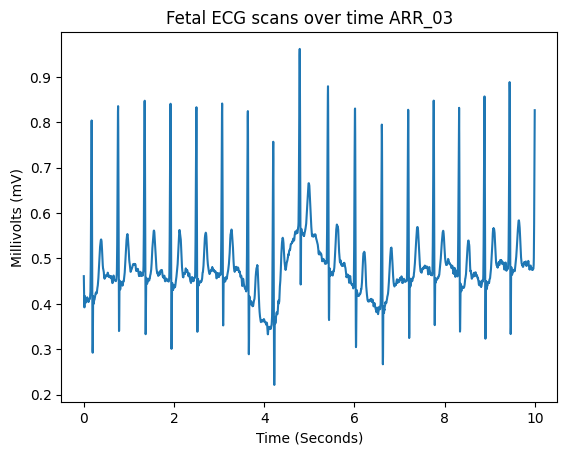

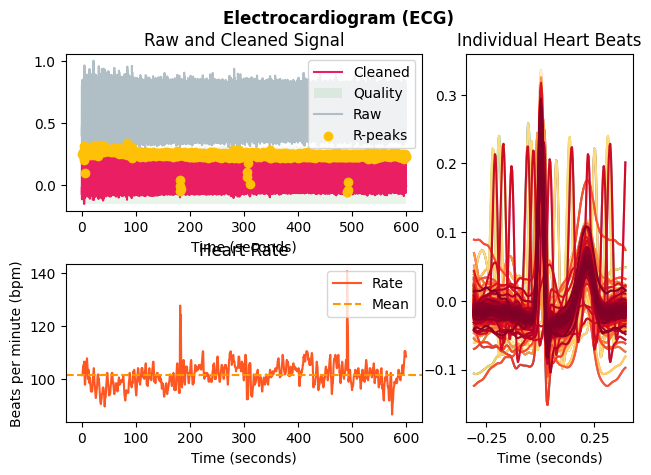

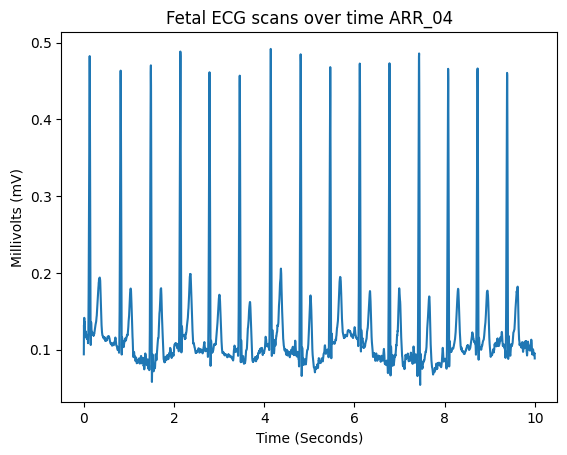

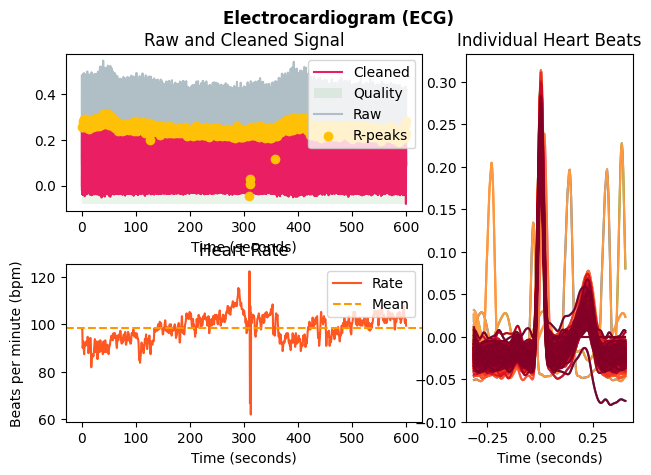

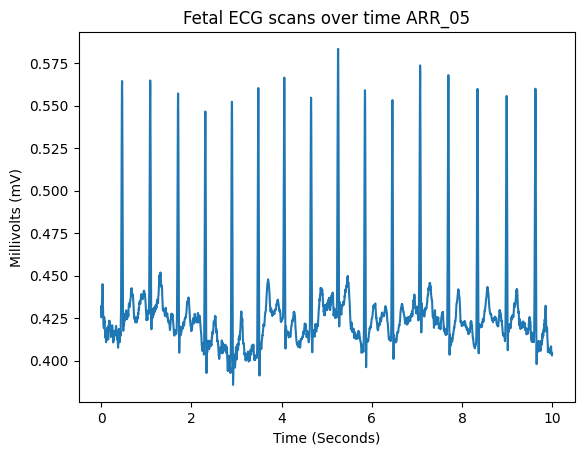

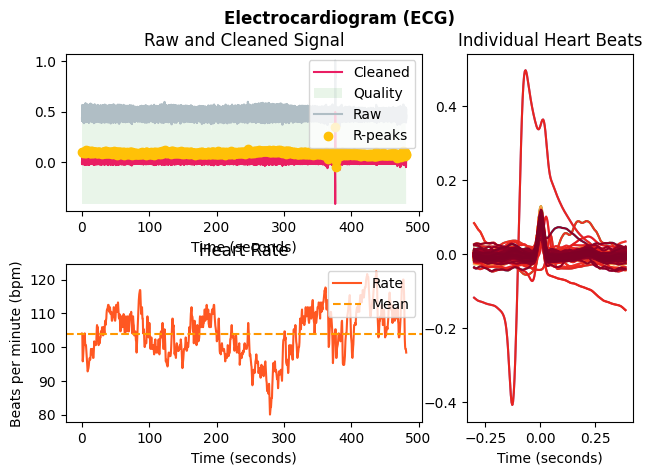

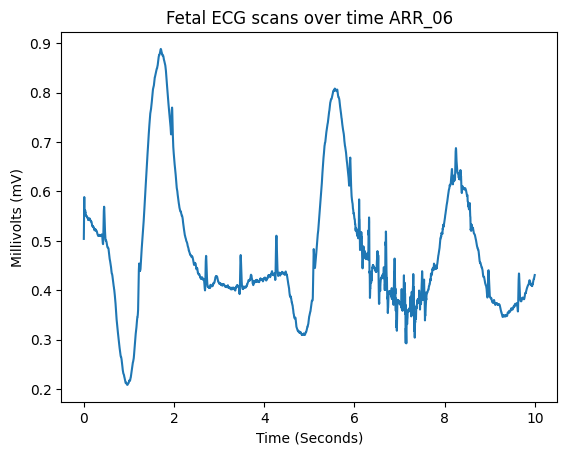

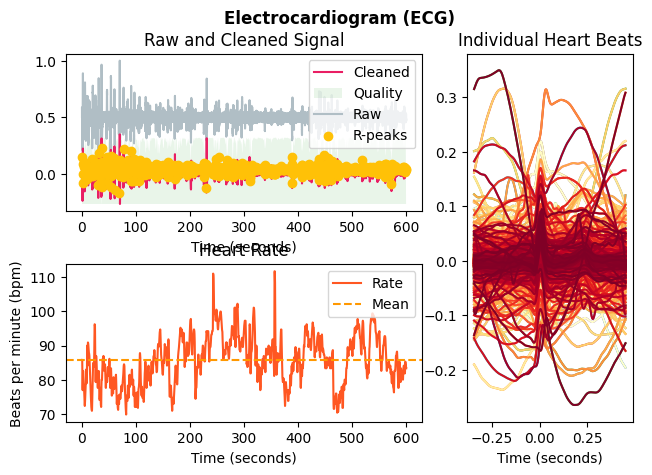

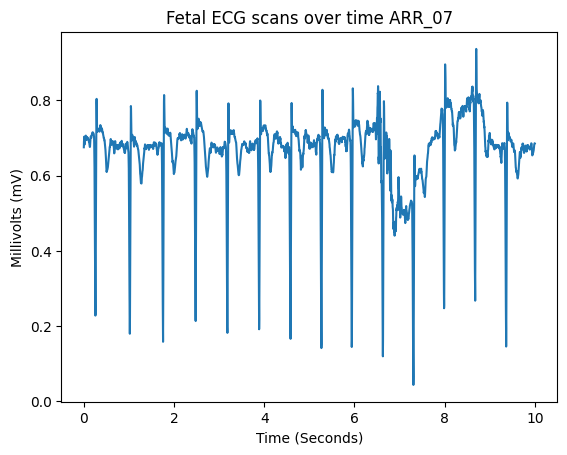

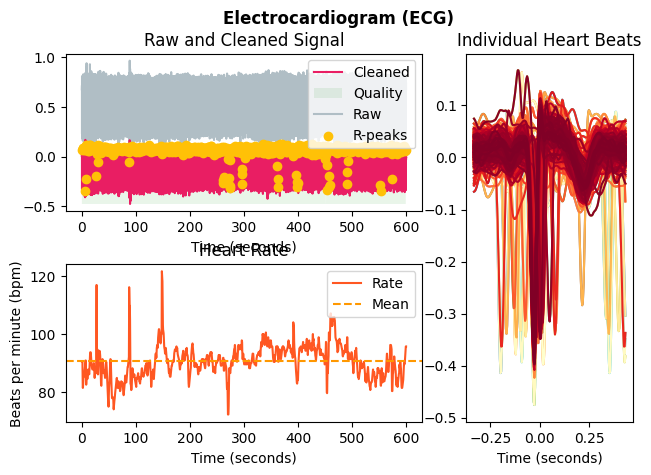

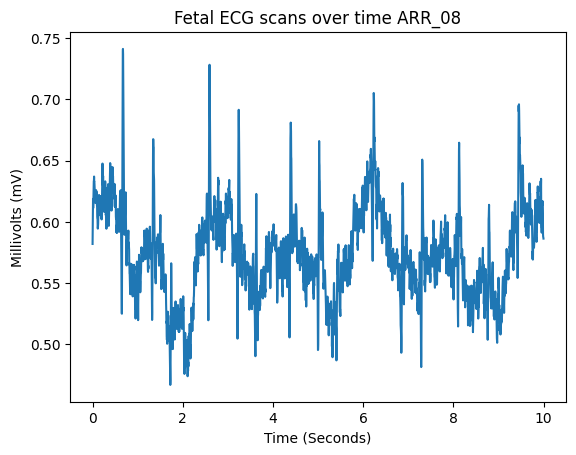

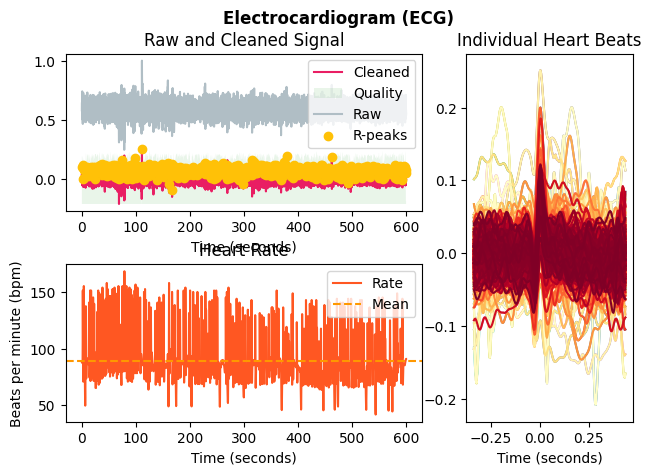

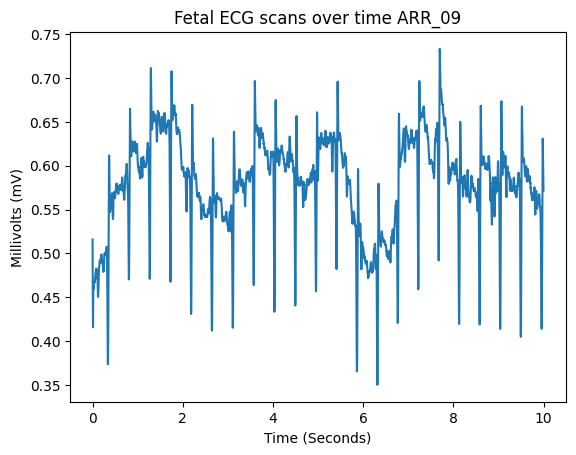

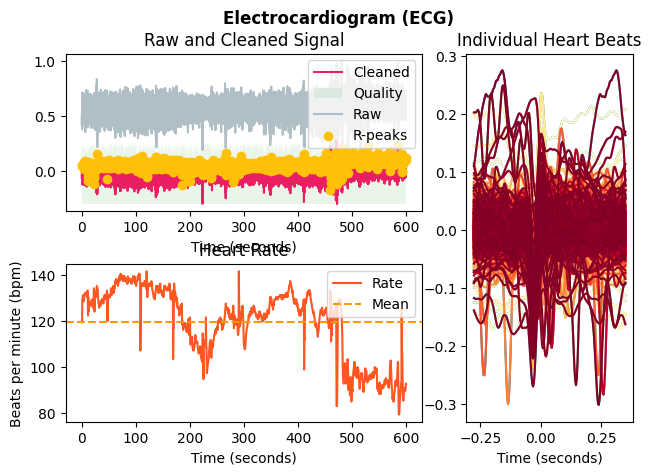

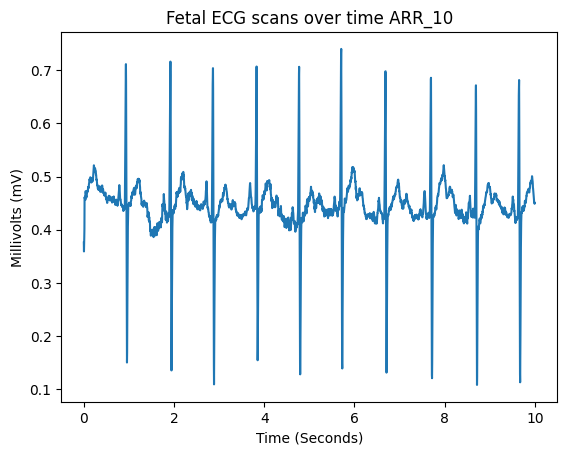

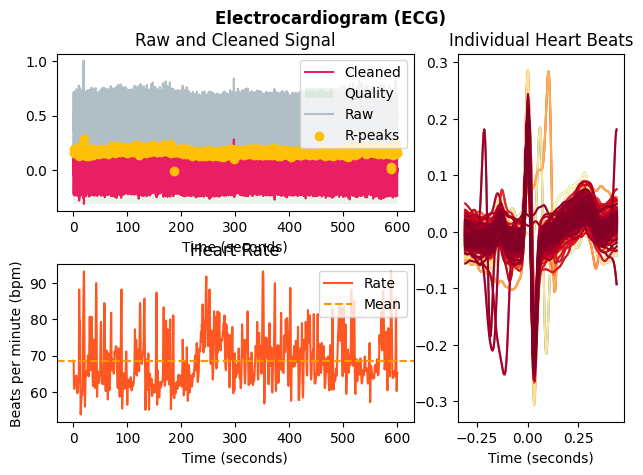

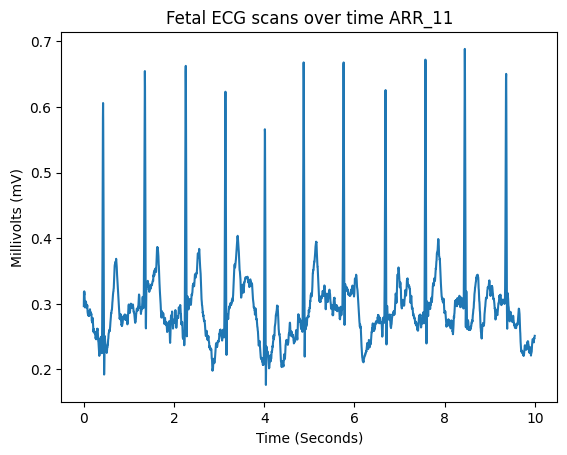

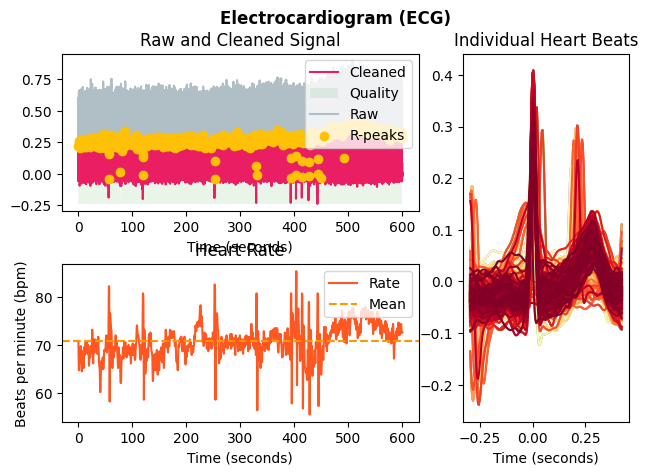

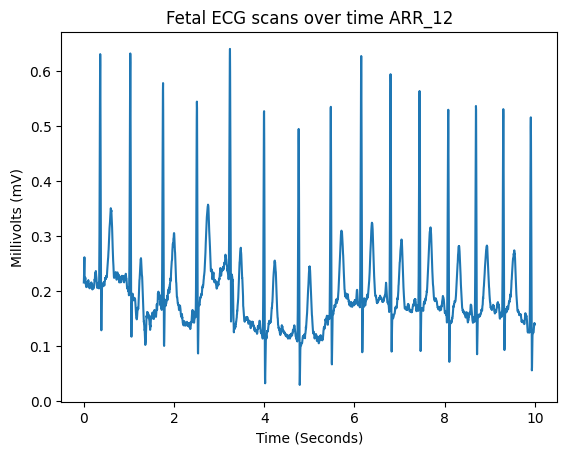

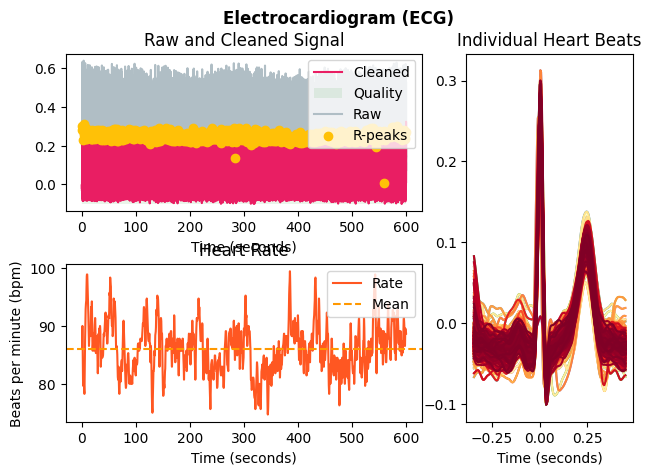

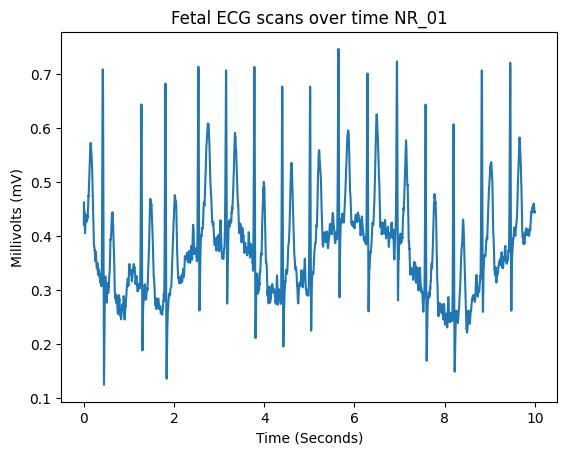

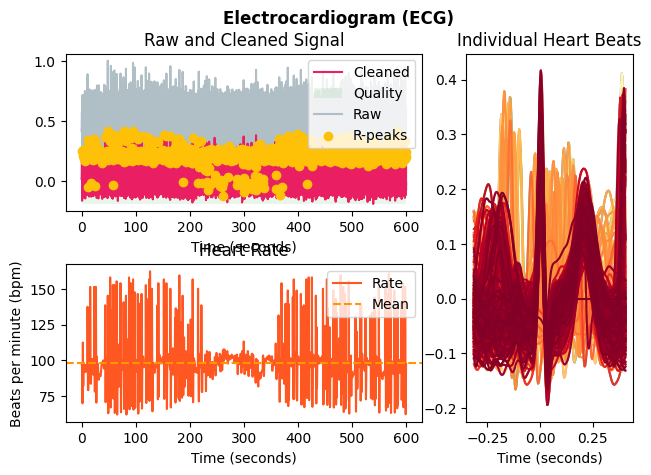

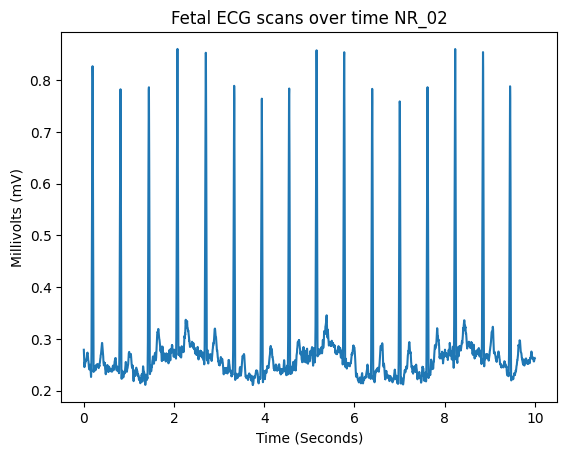

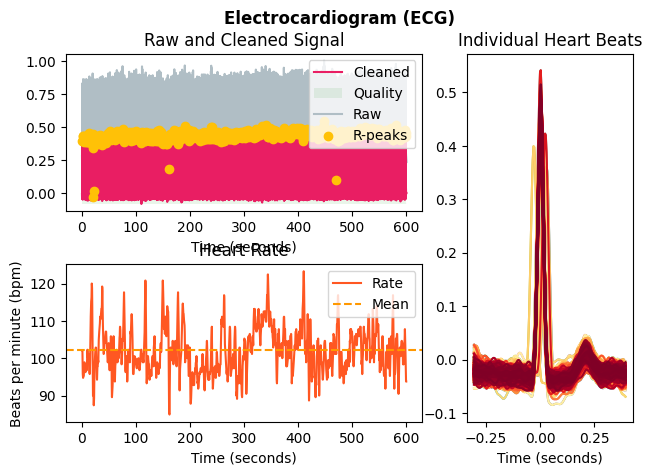

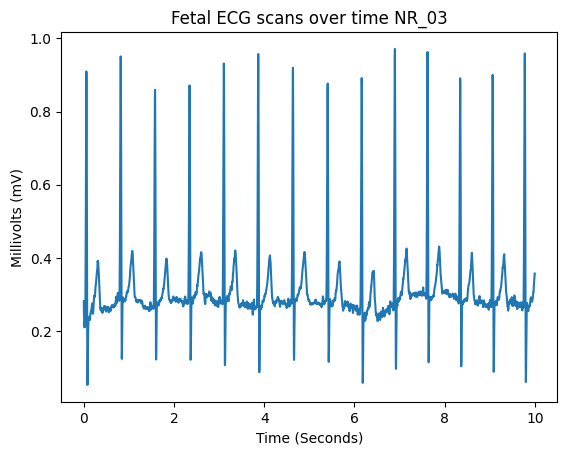

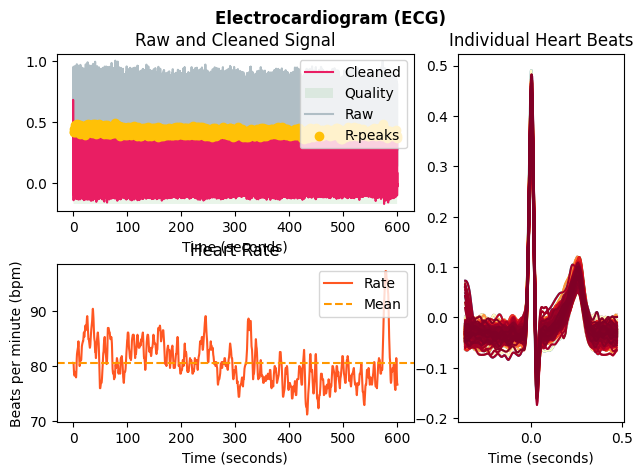

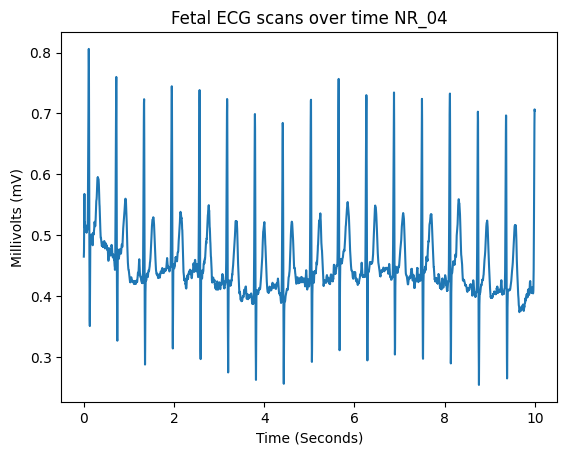

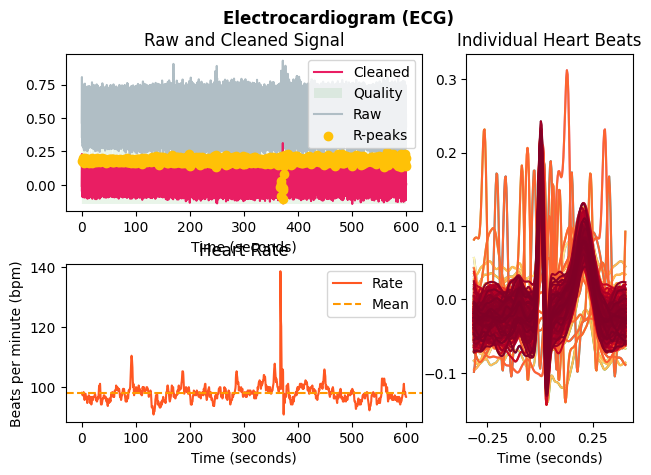

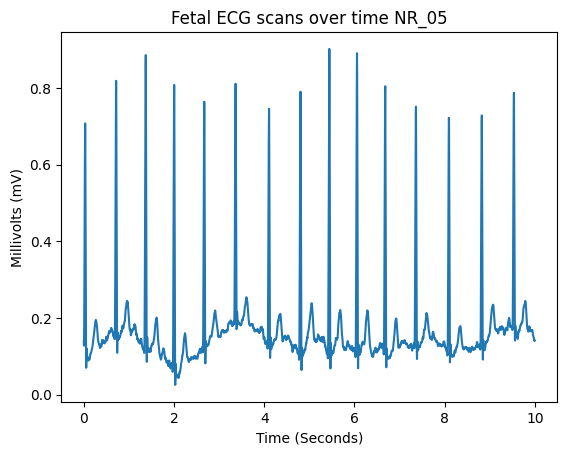

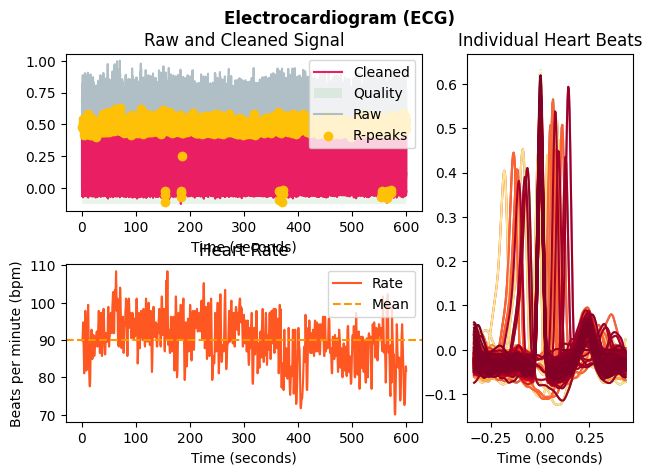

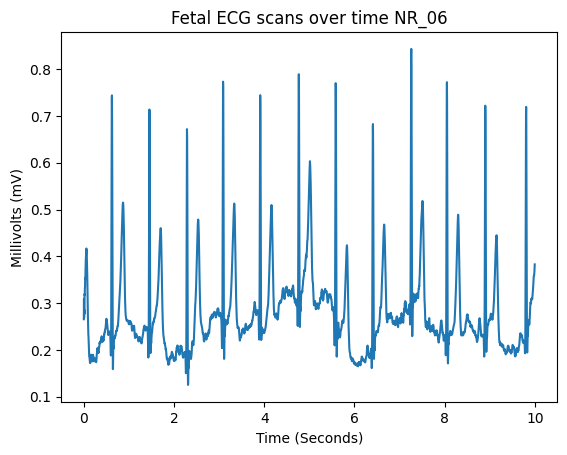

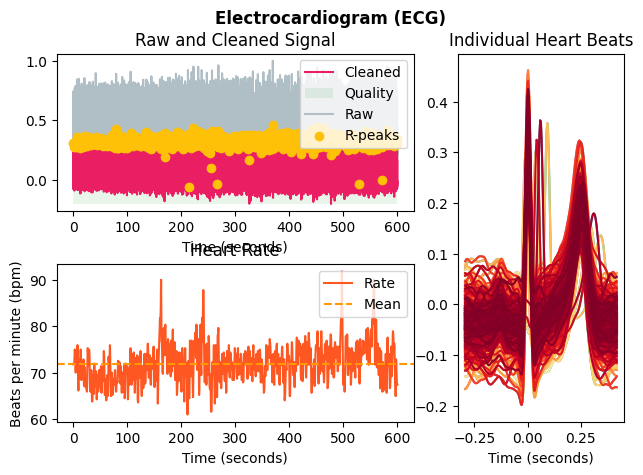

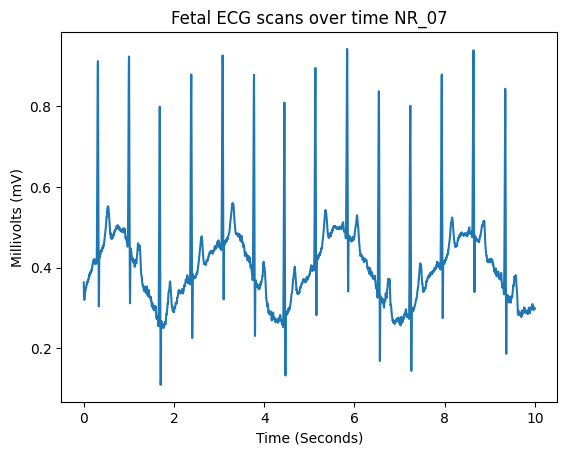

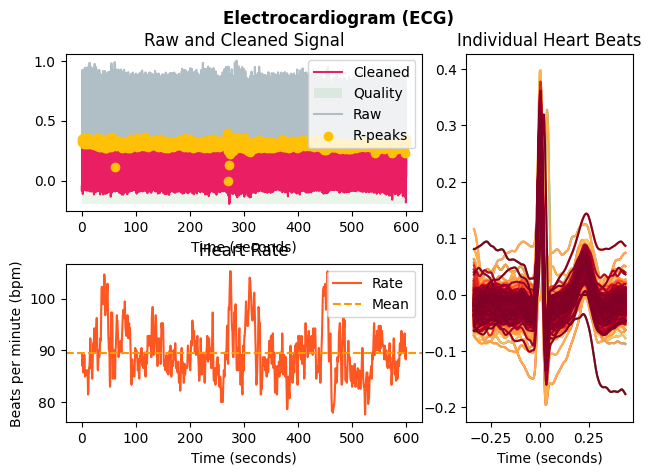

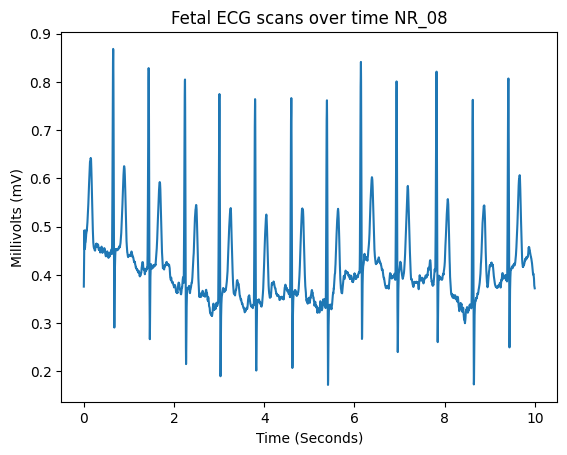

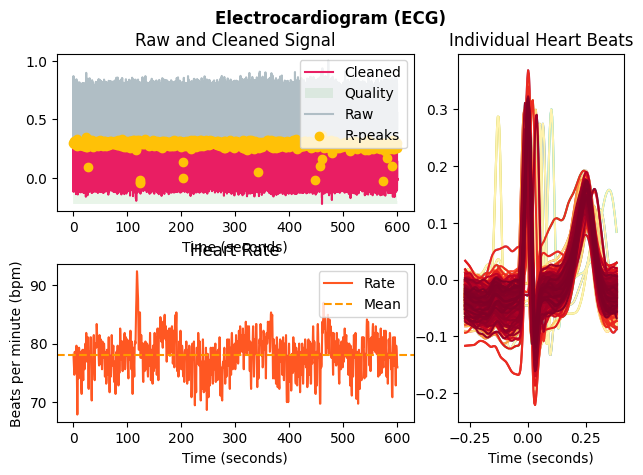

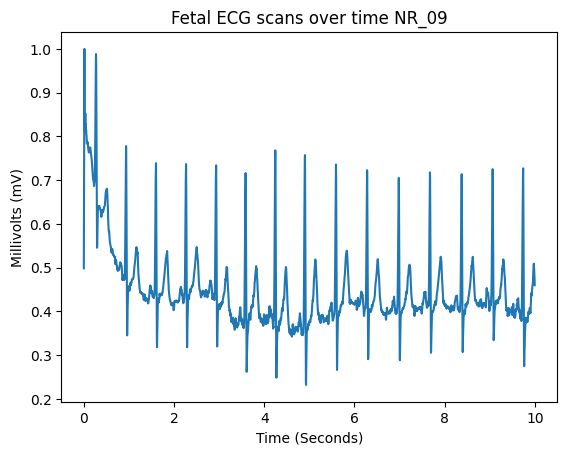

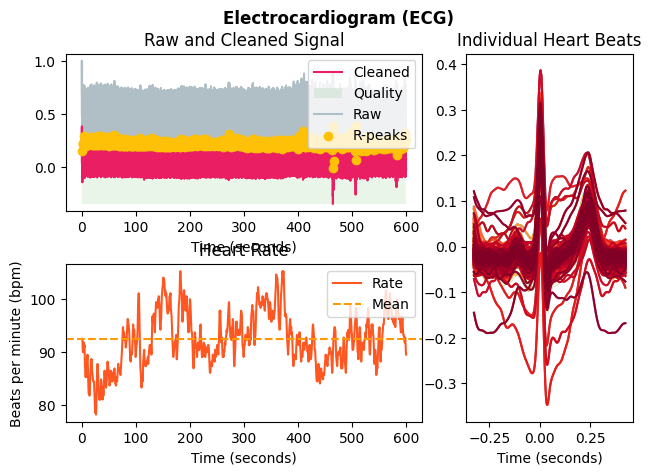

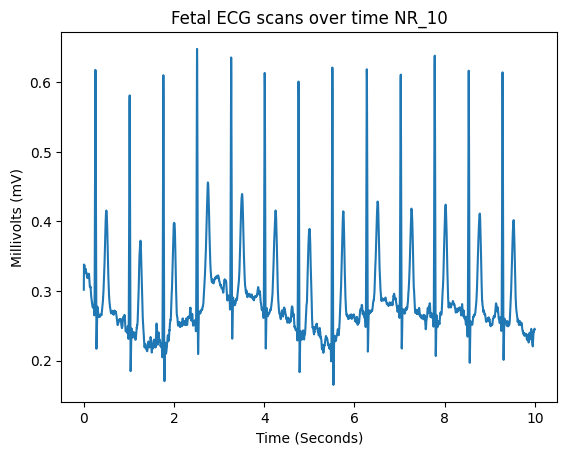

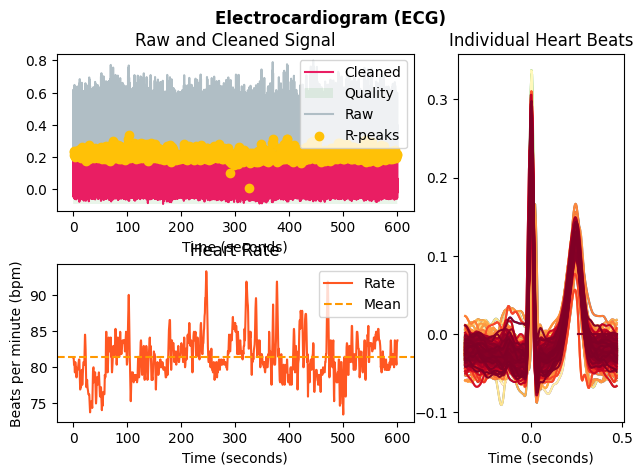

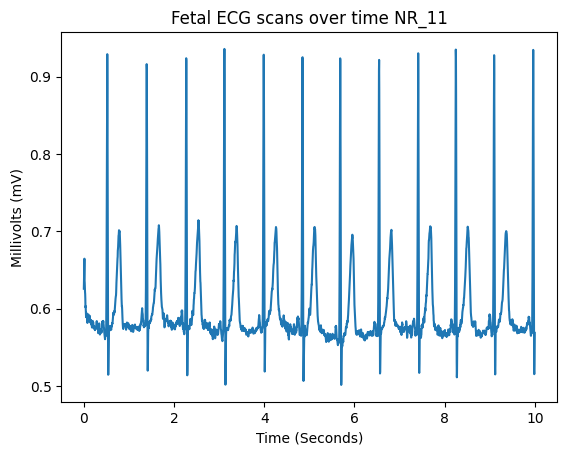

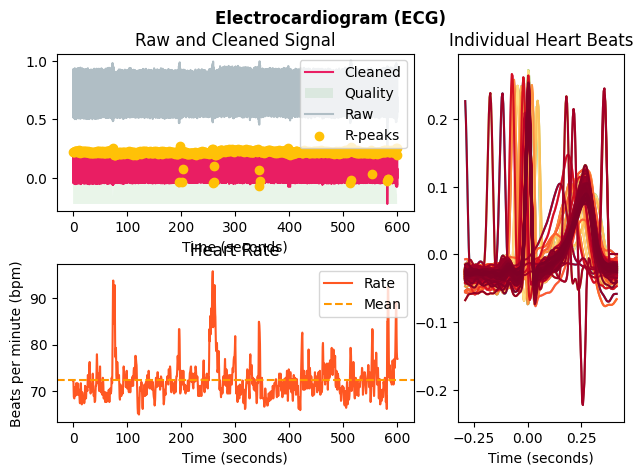

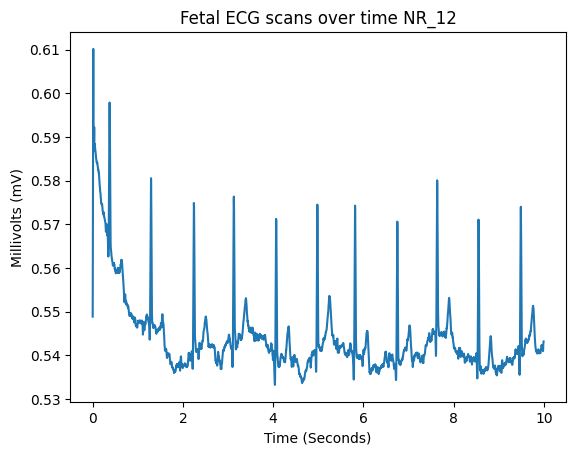

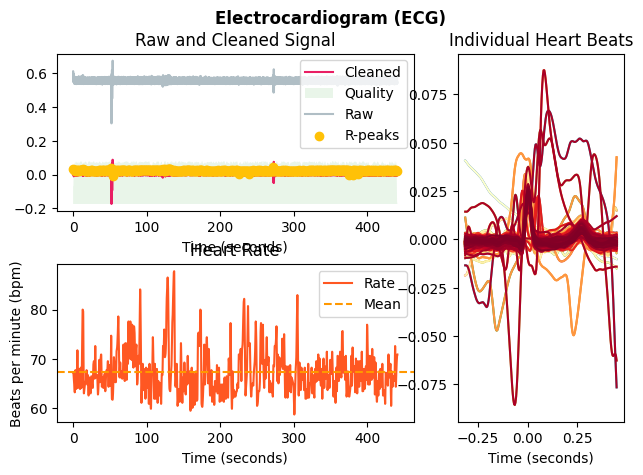

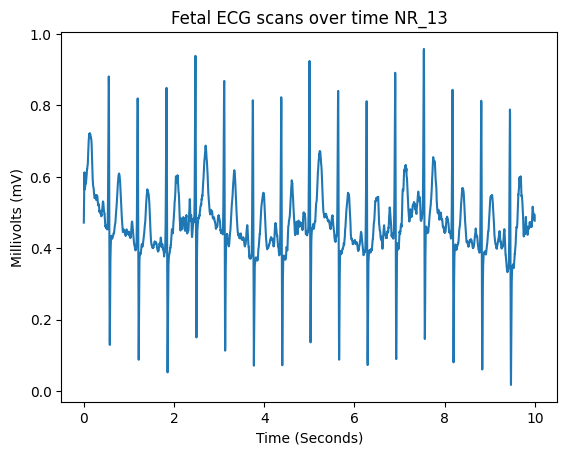

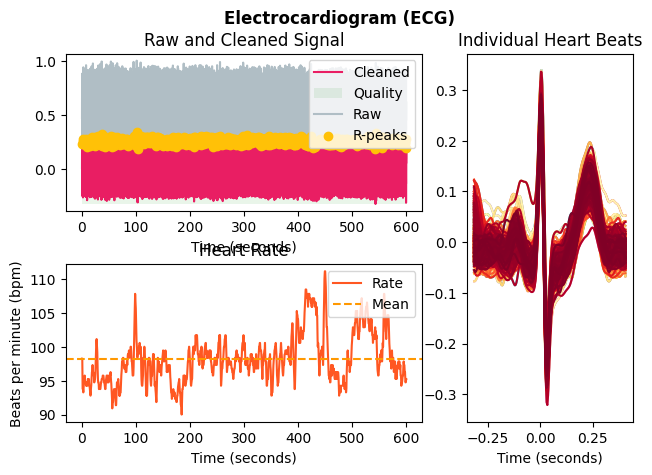

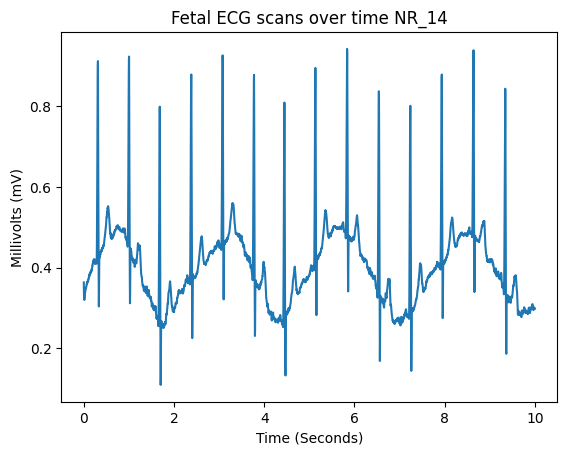

R peak    P peak    Q peak    S peak    T peak  PR duration  \
ARR_1   0.361038 -0.016912 -0.046997 -0.065835  0.105318     0.818333   
ARR_2   0.255169  0.008381 -0.048256 -0.232854  0.103205     0.066816   
ARR_3   0.246811 -0.017003 -0.029713 -0.061681  0.059320     0.574561   
ARR_4   0.242394 -0.015291 -0.029702 -0.023097  0.041411     0.060000   
ARR_5   0.091835  0.000329 -0.011399 -0.011164  0.005107     0.274662   
ARR_6   0.042751 -0.000120 -0.013491 -0.012145  0.010617     0.150000   
ARR_7   0.073037  0.022302 -0.325726 -0.001517  0.038384     0.137207   
ARR_8   0.073815  0.010077 -0.033049 -0.008264  0.013789     0.118690   
ARR_9   0.057587  0.001688 -0.098644 -0.002293  0.017909     0.140667   
ARR_10  0.171398  0.012768 -0.024497 -0.206543  0.035890     0.832381   
ARR_11  0.279993 -0.016434 -0.042700 -0.033732  0.058532     0.402000   
ARR_12  0.247838 -0.015294 -0.037361 -0.071597  0.097039     0.185094   
NR_1    0.223843  0.003270 -0.053466 -0.101740  0.135558     0.515194   
NR_2    0.435692 -0.024774 -0.042188 -0.042605 -0.005303     0.666667   
NR_3    0.418385 -0.028525 -0.043178 -0.108119  0.080284     0.525556   
NR_4    0.185433 -0.008841 -0.030697 -0.081498  0.078297     0.601795   
NR_5    0.484259 -0.027118 -0.048473 -0.051583  0.045476     0.691667   
NR_6    0.324027 -0.012979 -0.065592 -0.058493  0.192852     0.458506   
NR_7    0.302031 -0.015111 -0.031468 -0.074222  0.052283     0.445833   
NR_8    0.291233 -0.029689 -0.053222 -0.105193  0.130246     0.046667   
NR_9    0.216459 -0.003176 -0.034577 -0.084641  0.082843     0.121473   
NR_10   0.215110 -0.015855 -0.035531 -0.050471  0.119304     0.444417   
NR_11   0.222142 -0.025176 -0.033841 -0.036514  0.098512     0.122632   
NR_12   0.023693 -0.000717 -0.003507 -0.003016  0.003310     0.494713   
NR_13   0.255169  0.008381 -0.048256 -0.232854  0.103205     0.066816   
NR_14   0.302031 -0.015111 -0.031468 -0.074222  0.052283     0.445833   

        ST duration  QRS duration  QT duration  RR_duration  Heart rate  \
ARR_1      0.000000      0.000000     0.222994     0.770511   78.102850   
ARR_2      0.079443      0.265233     0.185790     0.610748   98.375768   
ARR_3      0.127619      0.300476     0.178806     0.592321  101.608901   
ARR_4      0.123333      0.276667     0.138499     0.610112   98.707483   
ARR_5      0.255693      0.257944     0.150265     0.576918  104.497944   
ARR_6      0.611151      0.000000     0.400159     0.701729   86.525214   
ARR_7      0.132817      0.471667     0.300000     0.662665   91.087823   
ARR_8      0.090738      0.323915     0.258250     0.683721   93.008195   
ARR_9      0.473967      0.337833     0.370593     0.502316  121.551631   
ARR_10     0.096667      0.302727     0.208297     0.873800   69.524388   
ARR_11     0.123333      0.358889     0.183918     0.845777   71.697472   
ARR_12     0.087333      0.289259     0.205165     0.697210   86.262097   
NR_1       0.095867      0.266000     0.166378     0.618624  100.351711   
NR_2       0.000000      0.000000     0.106225     0.587409  102.509393   
NR_3       0.180000      0.400000     0.205514     0.744701   80.755114   
NR_4       0.075417      0.245417     0.167041     0.611675   98.255299   
NR_5       0.000000      0.000000     0.479916     0.667235   90.453616   
NR_6       0.067843      0.276667     0.206867     0.835202   72.085639   
NR_7       0.153333      0.345556     0.187625     0.670723   89.721815   
NR_8       0.120000      0.333333     0.196153     0.768579   78.223757   
NR_9       0.087828      0.288469     0.200571     0.648592   92.784639   
NR_10      0.084215      0.288429     0.205107     0.737348   81.478205   
NR_11      0.080702      0.312456     0.228994     0.829778   72.706650   
NR_12      0.126410      0.213086     0.129093     0.887325   68.525477   
NR_13      0.079443      0.265233     0.185790     0.610748   98.375768   
NR_14      0.153333      0.345556     0.187625     0.670723   89.721815   

            

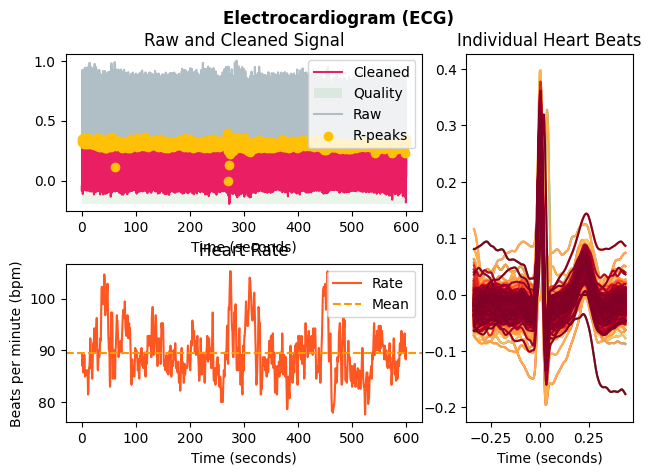

In [8]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np
from scipy import signal
import neurokit2 as nk
import statistics
import pandas as pd

def create_feature_matrix(features, feature_matrix):
    column_names = ["R peak", "P peak","Q peak","S peak","T peak","PR duration","ST duration","QRS duration","QT duration","RR_duration", "Heart rate", "min", "max", "mean", "std"]
    feature_matrix.append(pd.DataFrame([features], columns=column_names))
    return feature_matrix

def extract_durations(feature_location, sampling_rate):
   
   pr_segments = []
   r_waves = feature_location[0]
   p_waves = feature_location[1]
   q_waves = feature_location[2]
   s_waves = feature_location[3]
   t_waves = feature_location[4]
   
   if(len(q_waves)<len(p_waves)):
       for i in range (len(q_waves)):
        index_difference = q_waves[i]-p_waves[i]
        interval_duration = index_difference/sampling_rate
        pr_segments.append(interval_duration)
   else:
       for i in range (len(p_waves)):
            index_difference = q_waves[i]-p_waves[i]
            interval_duration = index_difference/sampling_rate
            pr_segments.append(interval_duration)
           
   st_segments = []
   if(len(t_waves)<len(s_waves)):
       for i in range (len(t_waves)):
        index_difference = t_waves[i]-s_waves[i]
        interval_duration = index_difference/sampling_rate
        st_segments.append(interval_duration)
   else:
       for i in range (len(s_waves)):
            index_difference = t_waves[i]-s_waves[i]
            interval_duration = index_difference/sampling_rate
            st_segments.append(interval_duration)
           
   qrs_segments = []
   if(len(s_waves)<len(q_waves)):
       for i in range (len(s_waves)):
        index_difference = s_waves[i]-q_waves[i]
        interval_duration = index_difference/sampling_rate
        qrs_segments.append(interval_duration)
   else:
       for i in range (len(q_waves)):
        index_difference = s_waves[i]-q_waves[i]
        interval_duration = index_difference/sampling_rate
        qrs_segments.append(interval_duration)

   qt_segments = []
   if(len(t_waves)<len(q_waves)):
       for i in range (len(t_waves)):
        index_difference = t_waves[i]-q_waves[i]
        interval_duration = index_difference/sampling_rate
        qt_segments.append(interval_duration)
   else:
       for i in range (len(q_waves)):
        index_difference = t_waves[i]-q_waves[i]
        interval_duration = index_difference/sampling_rate
        qt_segments.append(interval_duration)
   
   rr_segments = []
   for i in range(len(r_waves)):
      if(i != len(r_waves)-1):
         index_difference = r_waves[i+1]-r_waves[i]
         interval_duration = index_difference/sampling_rate
         rr_segments.append(interval_duration)
   rr_duration = sum(rr_segments)/len(rr_segments)
 
   av_count = 0
   sums = 0    
   for seconds in pr_segments:
      if(seconds<1 and seconds>0):
        sums += seconds
        av_count += 1
   pr_duration = sums/av_count

   av_count = 0
   sums = 0    
   for seconds in st_segments:
      if(seconds<1 and seconds>0):
         sums += seconds
         av_count += 1
   st_duration = sums/av_count

   av_count = 0
   sums = 0    
   for seconds in qrs_segments:
      if(seconds<1 and seconds>0):
         sums += seconds
         av_count += 1
   if(av_count == 0):
    qrs_duration = 0
   else:
    qrs_duration = sums/av_count

   av_count = 0
   sums = 0    
   for seconds in qt_segments:
      if(seconds<1 and seconds>0):
         sums += seconds
         av_count += 1
   if(av_count == 0):
    qt_duration = 0
   else:
    qt_duration = sums/av_count

   return pr_duration, qrs_duration, qt_duration, st_duration, rr_duration

#create a single matrix with the feature list. 
def average_features(feature_list, data):
    num_rows = len(feature_list)
    num_columns = max(len(array) for array in feature_list)

    corrected_features = []
    matrix = [[0 for _ in range(num_columns)] for _ in range(num_rows)]
    for j, value in enumerate(feature_list[0]):
        matrix[0][j] = value

    for i in range(1, num_rows):
        for j, index in enumerate(feature_list[i]):
            matrix[i][j] = data[index]

    rows = len(matrix)
    columns = len(matrix[0])

    for i in range(1, rows):
        count = 0
        average_feature = 0
        for j in range(columns):
            if matrix[i][j] != 0:
                average_feature += matrix[i][j]
                count += 1
            else:
                break
        average_feature = average_feature/count
        corrected_features.append(average_feature)

    return corrected_features

#extract relevant features of the ECG signal and store them in a list of lists
def wave_extraction(signal,sampling_rate):
    processed_sig, _ = nk.ecg_process(signal,sampling_rate, method='neurokit')
    nk.ecg_plot(processed_sig, sampling_rate = 300 )
    
    cleaned_signal = processed_sig["ECG_Clean"]

    time_domain_features = [float(min(cleaned_signal)),float(max(cleaned_signal)),float(statistics.mean(cleaned_signal)),float(statistics.stdev(cleaned_signal))]
    
    rpeaks = nk.ecg_peaks(processed_sig, sampling_rate=300)
    r_peak_indices = rpeaks[1]
    r_peak_indices = r_peak_indices["ECG_R_Peaks"]

    heart_rate = nk.ecg_rate(r_peak_indices, 300, desired_length =None, interpolation_method='monotone_cubic')
    
    QSPT_features = nk.ecg_delineate(cleaned_signal,rpeaks=r_peak_indices,sampling_rate=300)
    
    p_peak_indices = [int(x) if not np.isnan(x) else -1 for x in QSPT_features[1]["ECG_P_Peaks"]]
    p_peak_indices = list(filter(lambda x: x != -1, p_peak_indices))

    q_peak_indices = [int(x) if not np.isnan(x) else -1 for x in QSPT_features[1]["ECG_Q_Peaks"]]
    q_peak_indices = list(filter(lambda x: x != -1, q_peak_indices))

    s_peak_indices = [int(x) if not np.isnan(x) else -1 for x in QSPT_features[1]["ECG_S_Peaks"]]
    s_peak_indices = list(filter(lambda x: x != -1, s_peak_indices))

    t_peak_indices = [int(x) if not np.isnan(x) else -1 for x in QSPT_features[1]["ECG_T_Peaks"]]
    t_peak_indices = list(filter(lambda x: x != -1, t_peak_indices))

    feature_list = [time_domain_features, r_peak_indices, p_peak_indices, q_peak_indices, s_peak_indices, t_peak_indices]
    return feature_list, heart_rate, cleaned_signal, time_domain_features

#resample the data 
def resample_signal(data,fs, new_fs):
    current_frequency = fs
    nyquist_frequency = new_fs
    
    frequency_ratio = nyquist_frequency/current_frequency
    total_resampled_samples = int(len(data)*(frequency_ratio))

    sampled_data = signal.resample(data, total_resampled_samples)
    return sampled_data

#normalize the signal
def normalize(data):

    minimum = np.min(data)
    maximum = np.max(data)

    data  = (data - minimum)/(maximum-minimum)
    return data

#plot the signal
def plot_signal(data, fs, seconds, signal_count, record_name):
    
    plt.title("Fetal ECG scans over time " + record_name)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Millivolts (mV)")

    x = np.arange(0, len(data))/fs
    plt.plot(x[0:seconds*fs], data[0:seconds*fs,0:signal_count])
    plt.show()

#store file paths of all 26 data sets in a list by accessing file records f
records_file_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/RECORDS'
with open(records_file_path, 'r') as f:
    record_names = f.read().splitlines()

feature_matrices = []

#iterate through each data file, resample and normalize, plot data and print features
for record_name in record_names:
    record_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/' + record_name
    record = wfdb.rdrecord(record_path)
    signals = record.p_signal
    fs = record.fs

    new_fs = 300
    sampled_data = resample_signal(signals,fs, new_fs)
    normalized_data = normalize(sampled_data)

    plt.figure()  
    plot_signal(normalized_data, new_fs, 10, 1, record_name)

    seconds = 600
    feature_indices, heart_rate, clean_signal, time_domain_features = wave_extraction(normalized_data[0:new_fs*seconds,0], new_fs)
    average_feature_values = average_features(feature_indices, clean_signal)
    DUR1, DUR2, DUR3, DUR4, DUR5 = extract_durations(feature_indices[1:6], 300)
    
    #If you need to change figures in the paper
    # if(record_name == 'ARR_12'):
       
    #    plt.figure()
    #    plt.title("Cleaned fECG " + record_name)
    #    plt.xlabel("Time (Seconds)")
    #    plt.ylabel("Millivolts (mV)")
    #    x = np.arange(0,len(clean_signal))/300
    #    plt.plot(x, clean_signal, color = 'orange')
    #    plt.savefig("ARR_12_C.png")
    #    plt.figure()
       
    #    plt.title("0-1 Normalzed fECG " + record_name)
    #    plt.xlabel("Time (Seconds)")
    #    plt.ylabel("Millivolts (mV)")
    #    fs = 300
    #    x = np.arange(0, len(normalized_data))/fs
    #    plt.plot(x[0:seconds*fs], normalized_data[0:seconds*fs,0:1])
    #    plt.savefig("ARR_12.png")
    #    plt.show()

    features = average_feature_values + [DUR1, DUR2, DUR3, DUR4, DUR5, sum(heart_rate) / len(heart_rate)] + time_domain_features
    feature_matrices = create_feature_matrix(features, feature_matrices)

feature_matrix = pd.concat(feature_matrices, ignore_index=True)
y_labels_arr = ['ARR_{}'.format(i) for i in range(1, 13)]
y_labels_nr = ['NR_{}'.format(i) for i in range(1, 15)]
y_labels = y_labels_arr + y_labels_nr
feature_matrix.index = y_labels
feature_matrix.insert(15, "subject_status", [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

display(feature_matrix)
feature_matrix.to_csv('feature_matrix.csv', index=False) 
    